# Behavioral Research: Does sugar and fat change the feeding and drinking behavior of animals?

This Jupyter notebook compiles all the activities of the rats into 4 dataframe, sorted by time and diet. It also creates individual dataframes, sorted by time in **1-second intervals**, for eating and sucrose activity. These dataframe will allow us to:
1. plot time charts to visualize their **average** activities overtime.
2. plot raster plots to also visualize each rat's **individual** activity overtime

## Import Libraries and Excel Sheets

Begin by running the code below everytime you work with this notebook. The following two cells will merge the activities of all the rats together. **After running this cell, scroll to the cell that imports the CSV files with binary data** The other cells in between are used to create the CSV binary files in the first place.

In [2]:
#----------------------------------------------------------
# Import important libraries
#----------------------------------------------------------
import pandas as pd
import numpy as np
import datetime
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import matplotlib.gridspec as gridspec

#----------------------------------------------------------
# Set Fonts and Background for the Figures
#----------------------------------------------------------
sns.set()
sns.set_style("whitegrid", {'axes.grid' : False, 'axes.edgecolor': 'black', 'font.family': 'Arial'})
plt.rcParams['figure.dpi'] = 1000

In [3]:
#----------------------------------------------------------
# Set file path to necessary .xlsx files with training and test data
#----------------------------------------------------------
path = os.getcwd()
files = os.listdir(path)

#----------------------------------------------------------
# Method to collect all the .xlxs files into lists separated by diet and create a dataframe
#----------------------------------------------------------
def get_dataframe(diet_name):
    list_to_fill = [os.path.join(root, name)
             for root, dirs, files in os.walk(path)
             for name in files
             if name.endswith((diet_name + ".xlsx", diet_name + ".xls")) & name.startswith(('Rat'))]
    diet_dataframe = pd.DataFrame()
    for i in list_to_fill:
        df = pd.read_excel(i, index_col = "seconds")
        diet_dataframe = diet_dataframe.append(df)
    diet_dataframe = diet_dataframe.sort_index()
    return diet_dataframe

#----------------------------------------------------------
# Extract all .xlsx files from the list into 4 pandas dataframes - separated by diet
#----------------------------------------------------------
cont_restr_compiled = get_dataframe("Control_Restricted")
hfhs_restr_compiled = get_dataframe("HFHS_Restricted")
cont_adlib_compiled = get_dataframe("Control_Adlib")
hfhs_adlib_compiled = get_dataframe("HFHS_Adlib")
hfhs_restr_compiled.head()

Subject  Behavior Status   Time  Hour   Name  \
seconds                                                                  
1970-01-01 00:00:00.000  Rat33_00   Sucrose  START  0.000     0  Rat33   
1970-01-01 00:00:00.852  Rat31_00   Feeding  START  0.852     0  Rat31   
1970-01-01 00:00:01.602  Rat29_00   Feeding  START  1.602     0  Rat29   
1970-01-01 00:00:02.653  Rat32_00  Grooming  START  2.653     0  Rat32   
1970-01-01 00:00:03.654  Rat35_00   Feeding  START  3.654     0  Rat35   

                         seconds.1                Datetime        Act_Time  \
seconds                                                                      
1970-01-01 00:00:00.000      0.000 1969-12-31 19:00:00.000         0:00:00   
1970-01-01 00:00:00.852      0.852 1969-12-31 19:00:00.852  0:00:00.852000   
1970-01-01 00:00:01.602      1.602 1969-12-31 19:00:01.602  0:00:01.602000   
1970-01-01 00:00:02.653      2.653 1969-12-31 19:00:02.653  0:00:02.653000   
1970-01-01 00:00:03.654      3.654 1969-12-31 19:00:03.654  0:00:03.654000   

                         Real_Time_Hr  
seconds                                
1970-01-01 00:00:00.000      0.000000  
1970-01-01 00:00:00.852      0.000237  
1970-01-01 00:00:01.602      0.000445  
1970-01-01 00:00:02.653      0.000737  
1970-01-01 00:00:03.654      0.001015

## Add columns of 1s and 0s for each activity to specify whether a behavior is occurring 
- This will allow you to make graphs based on specific rat behaviors
- You do not need to input anything in this block. Just run it

In [4]:
#----------------------------------------------------------
# Create a copy of the diet dataframe with all the data and add columns logging which activity was performed at each time interval
# A '1' indicates the activity STARTed at that time. 
#----------------------------------------------------------
def add_binary(all_data):
    all_data_copy = all_data.copy()
    behaviors = ['Water', 'Feeding', 'Grooming', 'Rearing', 'Sleeping/Resting', 'Sucrose']
    #Add columns that log which activity was performed (except for Zoomie)
    for i in behaviors:
        behavior_column = (all_data_copy['Status'] == 'START') & (all_data_copy['Behavior'] == i)
        all_data_copy[i + "_" + 'Activity'] = behavior_column.astype(int)
    #Add column for Zoomie since it uses POINT to notify activity rather than START or STOP
    zoom = (all_data_copy['Status']>= 'POINT') & (all_data_copy['Behavior'] == 'Zoomie')
    all_data_copy['Zoomie_Activity'] = zoom.astype(int)
    
    return all_data_copy

#----------------------------------------------------------
# Create the binary diet dataframes
#----------------------------------------------------------
cont_restr_binary = add_binary(cont_restr_compiled)
hfhs_restr_binary = add_binary(hfhs_restr_compiled)
cont_adlib_binary = add_binary(cont_adlib_compiled)
hfhs_adlib_binary = add_binary(hfhs_adlib_compiled)
hfhs_restr_binary.head(15)

Subject  Behavior Status    Time  Hour   Name  \
seconds                                                                   
1970-01-01 00:00:00.000  Rat33_00   Sucrose  START   0.000     0  Rat33   
1970-01-01 00:00:00.852  Rat31_00   Feeding  START   0.852     0  Rat31   
1970-01-01 00:00:01.602  Rat29_00   Feeding  START   1.602     0  Rat29   
1970-01-01 00:00:02.653  Rat32_00  Grooming  START   2.653     0  Rat32   
1970-01-01 00:00:03.654  Rat35_00   Feeding  START   3.654     0  Rat35   
1970-01-01 00:00:05.100  Rat36_00  Grooming  START   5.100     0  Rat36   
1970-01-01 00:00:19.901  Rat33_00   Sucrose   STOP  19.901     0  Rat33   
1970-01-01 00:00:23.102  Rat30_00   Rearing  START  23.102     0  Rat30   
1970-01-01 00:00:23.351  Rat36_00  Grooming   STOP  23.351     0  Rat36   
1970-01-01 00:00:23.904  Rat32_00  Grooming   STOP  23.904     0  Rat32   
1970-01-01 00:00:25.853  Rat30_00   Rearing   STOP  25.853     0  Rat30   
1970-01-01 00:00:26.602  Rat30_00   Rearing  START  26.602     0  Rat30   
1970-01-01 00:00:27.352  Rat30_00   Rearing   STOP  27.352     0  Rat30   
1970-01-01 00:00:28.852  Rat30_00   Rearing  START  28.852     0  Rat30   
1970-01-01 00:00:30.852  Rat30_00   Rearing   STOP  30.852     0  Rat30   

                         seconds.1                Datetime        Act_Time  \
seconds                                                                      
1970-01-01 00:00:00.000      0.000 1969-12-31 19:00:00.000         0:00:00   
1970-01-01 00:00:00.852      0.852 1969-12-31 19:00:00.852  0:00:00.852000   
1970-01-01 00:00:01.602      1.602 1969-12-31 19:00:01.602  0:00:01.602000   
1970-01-01 00:00:02.653      2.653 1969-12-31 19:00:02.653  0:00:02.653000   
1970-01-01 00:00:03.654      3.654 1969-12-31 19:00:03.654  0:00:03.654000   
1970-01-01 00:00:05.100      5.100 1969-12-31 19:00:05.100  0:00:05.100000   
1970-01-01 00:00:19.901     19.901 1969-12-31 19:00:19.901  0:00:19.901000   
1970-01-01 00:00:23.102     23.102 1969-12-31 19:00:23.102  0:00:23.102000   
1970-01-01 00:00:23.351     23.351 1969-12-31 19:00:23.351  0:00:23.351000   
1970-01-01 00:00:23.904     23.904 1969-12-31 19:00:23.904  0:00:23.904000   
1970-01-01 00:00:25.853     25.853 1969-12-31 19:00:25.853  0:00:25.853000   
1970-01-01 00:00:26.602     26.602 1969-12-31 19:00:26.602  0:00:26.602000   
1970-01-01 00:00:27.352     27.352 1969-12-31 19:00:27.352  0:00:27.352000   
1970-01-01 00:00:28.852     28.852 1969-12-31 19:00:28.852  0:00:28.852000   
1970-01-01 00:00:30.852     30.852 1969-12-31 19:00:30.852  0:00:30.852000   

                         Real_Time_Hr  Water_Activity  Feeding_Activity  \
seconds                                                                   
1970-01-01 00:00:00.000      0.000000               0                 0   
1970-01-01 00:00:00.852      0.000237               0                 1   
1970-01-01 00:00:01.602      0.000445               0                 1   
1970-01-01 00:00:02.653      0.000737               0                 0   
1970-01-01 00:00:03.654      0.001015               0                 1   
1970-01-01 00:00:05.100      0.001417               0                 0   
1970-01-01 00:00:19.901      0.005528               0                 0   
1970-01-01 00:00:23.102      0.006417               0                 0   
1970-01-01 00:00:23.351      0.006486               0                 0   
1970-01-01 00:00:23.904      0.006640               0                 0   
1970-01-01 00:00:25.853      0.007181               0                 0   
1970-01-01 00:00:26.602      0.007389               0                 0   
1970-01-01 00:00:27.352      0.007598               0                 0   
1970-01-01 00:00:28.852      0.008014               0                 0   
1970-01-01 00:00:30.852      0.008570               0                 0   

                         Grooming_Activity  Rearing_Activity  \
seconds                                                        
1970-01-01 00:00:00

## Rearrange dataframe for plotting the time intervals of a single activity over 24 hours

### Design a dataframe to analyze time/duration of specific activity for a "normalized" rat

### A normalized rat is the average of all rat activity (excluding NaN values) for every 1-second interval of time
Here, we will create a new dataframe separated by 1-second intervals. Rows will be time indices. Columns will be rat numbers. A "1" in a cell indicates that the rat was feeding (or drinking sucrose) throughout the 1-second interval. In this dataframe, the **duration** of the activity will be recorded. In other words, instead of just putting a '1' for every START (and counting bouts), there will be '1's from START until STOP (indicating duration in seconds). 

If you want the **counts or bouts of feeding/sucrose activity** and not duration, set the "counts" parameter in the method call to "True" when you use the method

In [5]:
#----------------------------------------------------------
# Method to design a 1-second bin pivot table ordered by rat Name and showing'duration' of feeding activity indicated by '1's.
#----------------------------------------------------------
def times(activity_capitalized, all_data_copy, diet, counts = False):
    # Create a dataframe with rows as time indices and columns as rat numbers. Values will be "1" or "0".
    times = all_data_copy.pivot_table(index = 'seconds', columns = ['Name'], values = [activity_capitalized + '_Activity'])
    
    # Round up any non-zero fractions to '1' - there have been cases where 2 activities "START"ed at the exact same time so instead of a "1" for both columns, there was a "0.5" for both. Therefore, we need to round 0.5 up to 1 
    times = np.ceil(times)

    # Forward-fill the empty NaN values for each rat with the '0' or '1' that came before it - THIS WILL CALCULATE THE DURATION OF THE ACTIVITY (if you just want counts, set the "counts" parameter to True when you call the function)
    if counts == False:
        times = times.ffill()
    
    # Backward-fill remaining empty Nan values for each rat with a '0'
    times = times.fillna(0)
    
    # Resample dataframe into 1-second intervals
    if counts == False:
        times = times.resample("1S").ffill()
    else:
        times = times.resample("1S").max()
    
    # Backward-fill remaining empty Nan values for each rat with a '0'
    times = times.fillna(0)
    
    # Convert the dataframe to integers rather than floats
    times = times.astype(int)
    
    ## Actively look into the Excel files, find the hours or intervals not recorded for each rat, and set each of those hours to NaN
    if diet == "Control Adlib":
        times.loc['1970-01-01 08:00:00':'1970-01-01 10:59:59', (activity_capitalized + '_Activity','Rat09')] = np.nan
        times.loc['1970-01-01 19:00:00':'1970-01-01 19:59:59', (activity_capitalized + '_Activity','Rat09')] = np.nan
        
    if diet == "Control Restricted":
        times.loc['1970-01-01 07:00:00':'1970-01-01 07:59:59'] = np.nan
        times.loc['1970-01-01 18:00:00':'1970-01-01 18:59:59'] = np.nan
        times.loc['1970-01-01 23:00:00':'1970-01-01 23:59:59', (activity_capitalized + '_Activity','Rat14')] = np.nan
        times.loc['1970-01-01 23:00:00':'1970-01-01 23:59:59', (activity_capitalized + '_Activity','Rat18')] = np.nan
        
    if diet == "HFHS Adlib":
        times.loc['1970-01-01 14:00:00':'1970-01-01 19:59:59', (activity_capitalized + '_Activity','Rat27')] = np.nan
        # Removed Rat 25 Completely
        #times.loc['1970-01-01 00:00:00.000':'1970-01-01 16:59:59.000', (activity_capitalized + '_Activity','Rat25')] = np.nan
        #times.loc['1970-01-01 18:00:00.000':'1970-01-01 23:59:59.000', (activity_capitalized + '_Activity','Rat25')] = np.nan
    
    #if diet == "HFHS Restricted":
    # Removed Rat 28 Completely
        #times.loc['1970-01-01 00:00:00.000':'1970-01-01 06:59:59.000', (activity_capitalized + '_Activity','Rat28')] = np.nan
    
    # Rearrange the hours so Hour 21 is the first hour
    m = times.index.get_level_values(0) > datetime.datetime(1970, 1, 1, 20, 59, 59)
    idx1 = times.index.get_level_values(0)
    times.index = idx1.where(m, idx1 +  datetime.timedelta(days=1))

    times = times.sort_index()                
    
    # Add 16 extra hours with value of '0' for time-restricted animals - THERE SHOULD BE JUST 0's FOR FEEDING AND SUCROSE ACTIVITY FOR ANYTHING OUTSIDE 8-HOUR INTERVAL
    if diet == "HFHS Restricted" or diet == "Control Restricted":
        dates = ["1970-01-01 21:00:00", "1970-01-01 22:00:00", "1970-01-02 7:00:00", "1970-01-02 8:00:00", "1970-01-02 9:00:00", "1970-01-02 10:00:00", "1970-01-02 11:00:00", "1970-01-02 12:00:00", "1970-01-02 13:00:00", "1970-01-02 14:00:00", "1970-01-02 15:00:00", "1970-01-02 16:00:00", "1970-01-02 17:00:00", "1970-01-02 18:00:00", "1970-01-02 19:00:00", "1970-01-02 20:00:00"]

        for i in dates:
            ts = pd.to_datetime(i, format="%Y-%m-%d %H:%M:%S")
            # Change the number of 0's to the number of rats
            if diet == "HFHS Restricted":
                new_row = pd.DataFrame([[0, 0, 0, 0, 0, 0, 0]], columns = times.columns, index=[ts])
            if diet == "Control Restricted":
                new_row = pd.DataFrame([[0, 0, 0, 0, 0, 0, 0, 0, 0]], columns = times.columns, index=[ts])
            times = pd.concat([times, pd.DataFrame(new_row)], ignore_index=False)
        times = times.sort_index()
    
    
    # Construct a normalized rat by finding the average of activity for all rats at each 1-second interval - Replace Nan values with 0 if any
    times[('','mean')] = times.mean(axis=1).fillna(0)
    
    # Drop duplicate rows based on the time indices
    times = times.loc[~times.index.duplicated(keep='first')]
    
    # Remove multi-level columns
    times.columns = times.columns.get_level_values(1)
    
    # Rename the Index from "Name" to ""
    #times = times.rename_axis("Date_Time", axis="columns")
    times = times.rename_axis(columns = {"Name":""})
        
    return times

#----------------------------------------------------------
# Create the 1-second dataframes
#----------------------------------------------------------
hfhs_restr_feeding = times('Feeding', hfhs_restr_binary, "HFHS Restricted")
cont_restr_feeding = times('Feeding', cont_restr_binary, "Control Restricted")
hfhs_adlib_feeding = times('Feeding', hfhs_adlib_binary, "HFHS Adlib")
cont_adlib_feeding = times('Feeding', cont_adlib_binary, "Control Adlib")

hfhs_restr_sucrose = times('Sucrose', hfhs_restr_binary, "HFHS Restricted")
hfhs_adlib_sucrose = times('Sucrose', hfhs_adlib_binary, "HFHS Adlib")
hfhs_restr_feeding.head()

Rat29  Rat30  Rat31  Rat32  Rat33  Rat35  Rat36  mean
1970-01-01 21:00:00      0      0      0      0      0      0      0   0.0
1970-01-01 21:00:01      0      0      0      0      0      0      0   0.0
1970-01-01 21:00:02      0      0      0      0      0      0      0   0.0
1970-01-01 21:00:03      0      0      0      0      0      0      0   0.0
1970-01-01 21:00:04      0      0      0      0      0      0      0   0.0

# Create CSV files with Normalized Data for Feeding and Drinking Sucrose with 1-Second Intervals

In [6]:
#----------------------------------------------------------
# Create CSV file for Normalized Activity
#----------------------------------------------------------
# Feeding
normalized_feeding = pd.DataFrame()
normalized_feeding = normalized_feeding.append(cont_adlib_feeding['mean'])
normalized_feeding = normalized_feeding.append(hfhs_adlib_feeding['mean'])
normalized_feeding = normalized_feeding.append(cont_restr_feeding['mean'])
normalized_feeding = normalized_feeding.append(hfhs_restr_feeding['mean'])
feeding_to_print = normalized_feeding.T
feeding_to_print = feeding_to_print.sort_index().fillna(0)
feeding_to_print.to_csv('Feeding_Normalized_Activity.csv', index = True, index_label = "Date_Time", header = ['Control Ad Lib', 'HFHS Ad Lib', 'Control Restricted', 'HFHS Restricted'], date_format='%Y-%m-%d %H:%M:%S')

# Sucrose
normalized_sucrose = pd.DataFrame()
normalized_sucrose = normalized_sucrose.append(hfhs_adlib_sucrose['mean'])
normalized_sucrose = normalized_sucrose.append(hfhs_restr_sucrose['mean'])
sucrose_to_print = normalized_sucrose.T
sucrose_to_print = sucrose_to_print.sort_index().fillna(0)
sucrose_to_print.to_csv('Sucrose_Normalized_Activity.csv', index = True, index_label = "Date_Time", header = ['HFHS Ad Lib', 'HFHS Restricted'], date_format='%Y-%m-%d %H:%M:%S')


# Create CSV files with Binary Data for Feeding Activity

In [7]:
#----------------------------------------------------------
# Create CSV file for Normalized Activity
#----------------------------------------------------------
# 1-Second Binned CSV Files - Feeding
cont_restr_feeding.to_csv("Feeding_Control_Restricted_Binary.csv", index = True, columns = cont_restr_feeding.columns[:-1], date_format='%Y-%m-%d %H:%M:%S', index_label = "Date_Time")
hfhs_restr_feeding.to_csv("Feeding_HFHS_Restricted_Binary.csv", index = True, columns = hfhs_restr_feeding.columns[:-1], date_format='%Y-%m-%d %H:%M:%S', index_label = "Date_Time")
hfhs_adlib_feeding.to_csv("Feeding_HFHS_AdLib_Binary.csv", index = True, columns = hfhs_adlib_feeding.columns[:-1], date_format='%Y-%m-%d %H:%M:%S', index_label = "Date_Time")
cont_adlib_feeding.to_csv("Feeding_Control_AdLib_Binary.csv", index = True, columns = cont_adlib_feeding.columns[:-1], date_format='%Y-%m-%d %H:%M:%S', index_label = "Date_Time")

# 1-Second Binned CSV Files - Sucrose
hfhs_restr_sucrose.to_csv("Sucrose_HFHS_Restricted_Binary.csv", index = True, columns = hfhs_restr_sucrose.columns[:-1], date_format='%Y-%m-%d %H:%M:%S', index_label = "Date_Time")
hfhs_adlib_sucrose.to_csv("Sucrose_HFHS_AdLib_Binary.csv", index = True, columns = hfhs_adlib_sucrose.columns[:-1], date_format='%Y-%m-%d %H:%M:%S', index_label = "Date_Time")


## Read CSV Files with Binary Data Back In - Start Here After Importing Libraries

In [8]:
# Links to all CSV files
hfhs_adlib_feeding_location = "https://www.dropbox.com/s/hvz5lziuutmk45v/Feeding_HFHS_AdLib_Binary.csv?dl=1"
cont_adlib_feeding_location = "https://www.dropbox.com/s/4ref8epzejqccvv/Feeding_Control_AdLib_Binary.csv?dl=1"
hfhs_restr_feeding_location = "https://www.dropbox.com/s/n5tux2lq630x747/Feeding_HFHS_Restricted_Binary.csv?dl=1"
cont_restr_feeding_location = "https://www.dropbox.com/s/2ihaa7zfh8uwi1s/Feeding_Control_Restricted_Binary.csv?dl=1"
hfhs_restr_sucrose_location = "https://www.dropbox.com/s/f24su76nrsp5hxq/Sucrose_HFHS_Restricted_Binary.csv?dl=1"
hfhs_adlib_sucrose_location = "https://www.dropbox.com/s/fsafpttmodnxm90/Sucrose_HFHS_AdLib_Binary.csv?dl=1"

normalized_feeding_location = "https://www.dropbox.com/s/klfr764ndrc76er/Feeding_Normalized_Activity.csv?dl=1"
normalized_sucrose_location = "https://www.dropbox.com/s/wdpvq3nwga9fjgs/Sucrose_Normalized_Activity.csv?dl=1"

# Feeding
hfhs_adlib_feeding = pd.read_csv(hfhs_adlib_feeding_location, index_col='Date_Time', parse_dates=True)
cont_adlib_feeding = pd.read_csv(cont_adlib_feeding_location, index_col='Date_Time', parse_dates=True)
hfhs_restr_feeding = pd.read_csv(hfhs_restr_feeding_location, index_col='Date_Time', parse_dates=True)
cont_restr_feeding = pd.read_csv(cont_restr_feeding_location, index_col='Date_Time', parse_dates=True)

# Sucrose
hfhs_restr_sucrose = pd.read_csv(hfhs_restr_sucrose_location, index_col='Date_Time', parse_dates=True)
hfhs_adlib_sucrose = pd.read_csv(hfhs_adlib_sucrose_location, index_col='Date_Time', parse_dates=True)

# Normalized Activity Dataframes
normalized_feeding = pd.read_csv(normalized_feeding_location, index_col='Date_Time', parse_dates=True)
normalized_sucrose = pd.read_csv(normalized_sucrose_location, index_col='Date_Time', parse_dates=True)


hfhs_adlib_feeding.head()

Rat21  Rat22  Rat23  Rat26  Rat27
Date_Time                                             
1970-01-01 21:00:00      0      0      0      0    0.0
1970-01-01 21:00:01      0      0      0      0    0.0
1970-01-01 21:00:02      0      0      0      0    0.0
1970-01-01 21:00:03      0      0      0      0    0.0
1970-01-01 21:00:04      0      0      0      0    0.0

In [9]:
normalized_feeding.tail()

Control Ad Lib  HFHS Ad Lib  Control Restricted  \
Date_Time                                                              
1970-01-02 20:59:55             0.0          0.0                 0.0   
1970-01-02 20:59:56             0.0          0.0                 0.0   
1970-01-02 20:59:57             0.0          0.0                 0.0   
1970-01-02 20:59:58             0.0          0.0                 0.0   
1970-01-02 20:59:59             0.0          0.0                 0.0   

                     HFHS Restricted  
Date_Time                             
1970-01-02 20:59:55              0.0  
1970-01-02 20:59:56              0.0  
1970-01-02 20:59:57              0.0  
1970-01-02 20:59:58              0.0  
1970-01-02 20:59:59              0.0

# Overall Integrated Time Panel
The following function will smooth out the activity of the **normalized** rat for each diet group and graph it on a time panel

## Making average activity smooth

In [10]:
#----------------------------------------------------------
# Method to create a rolling-average plot over 15 minutes
#----------------------------------------------------------
def runing_avg(x, sampling_freq, window):
    
    # Re-sample with lower frequency; frequency of re-sampling given by parameter sampling_freq
    y = x.resample(sampling_freq).sum()
    # Apply rolling window averaging
    z = y.rolling(window, win_type='boxcar').mean()
    z = z.fillna(0)
    return(z)

# Panel of Feeding Activity v2

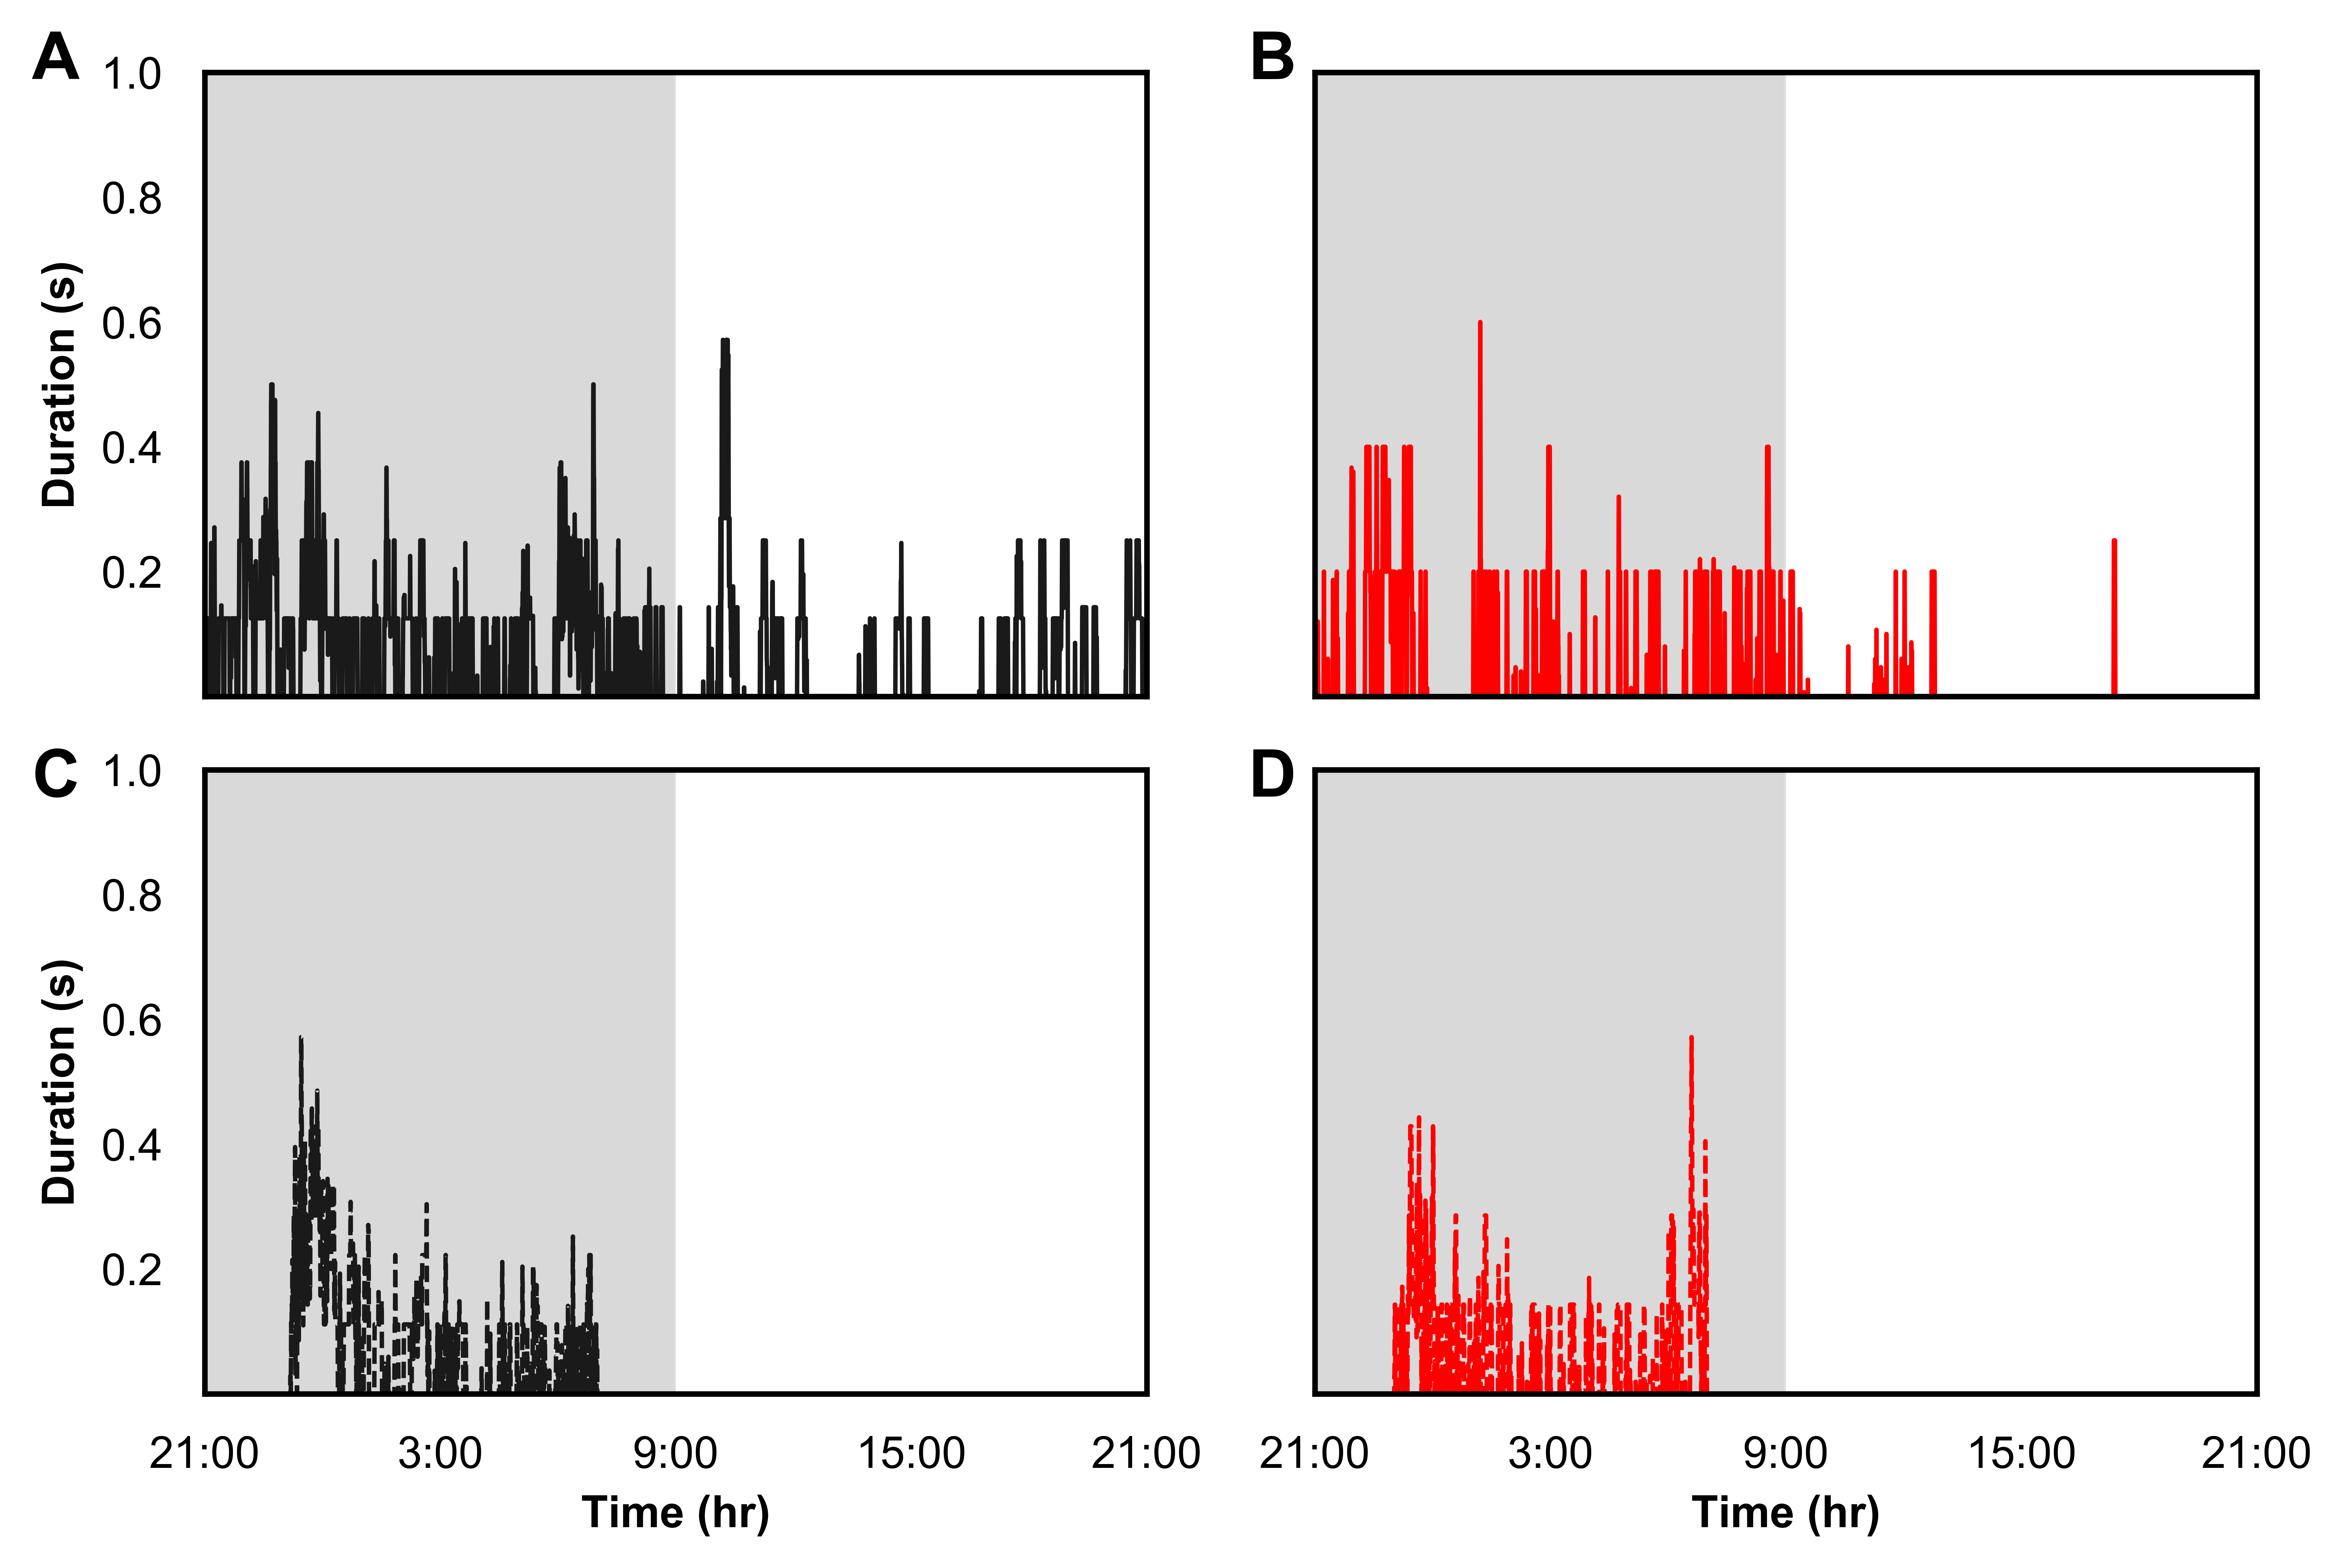

In [68]:
#----------------------------------------------------------
# Method to create a rolling-average Time Chart
#----------------------------------------------------------

def time_plot_panel_v2(diet_column, color, linestyle, ymax=1, ylabel = "Duration (s)"):
    plt.plot(runing_avg(diet_column, "1S", 30), color = color, linestyle = linestyle, lw = 1)
    plt.yticks(fontname = 'Arial', fontsize=10, color = 'black')
    plt.ylabel(ylabel, color = 'black', fontname = 'Arial', fontsize=10, fontweight='bold')
    plt.ylim(0, ymax)
    plt.xlim('1970-01-01 21:00:00.000', '1970-01-02 21:00:00.000')
    plt.xlabel('Time (hr)', fontname = 'Arial', fontsize=10, fontweight='bold', color = 'black')
    plt.xticks(['1970-01-01 21:00:00.000', '1970-01-02 03:00:00.000', '1970-01-02 9:00:00.000', '1970-01-02 15:00:00.000', '1970-01-02 21:00:00.000'],['21:00', '3:00', '9:00', '15:00', '21:00'], rotation=0, fontname = 'Arial', fontsize=10, color = 'black')
    plt.axvspan('1970-01-01 21:00:00.000', '1970-01-02 9:00:00.000', facecolor='black', alpha=0.15)

    # Clean up plot
    plt.tight_layout()

f = plt.figure(figsize = (7.48, 5))

# Control AdLib
plt.subplot(2, 2, 1)
time_plot_panel_v2(normalized_feeding["Control Ad Lib"], "0.1", "-")
plt.xlabel('')
plt.xticks([])

## Remove '0' from y-axis
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.figtext(0.02, 0.95, "A", fontsize = 15, color = "black", fontweight = "bold")

# HFHS AdLib
plt.subplot(2, 2, 2)
time_plot_panel_v2(normalized_feeding["HFHS Ad Lib"], "red", "-")
plt.xlabel('')
plt.xticks([])
plt.ylabel('')
plt.yticks([])
plt.figtext(0.53, 0.95, "B", fontsize = 15, color = "black", fontweight = "bold")

# Control Restricted
plt.subplot(2, 2, 3)
time_plot_panel_v2(normalized_feeding["Control Restricted"], "0.1", "--")

## Remove '0' from y-axis
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.figtext(0.02, 0.5, "C", fontsize = 15, color = "black", fontweight = "bold")

# HFHS Restricted
plt.subplot(2, 2, 4)
time_plot_panel_v2(normalized_feeding["HFHS Restricted"], "red", "--")
plt.ylabel('')
plt.yticks([])
plt.figtext(0.53, 0.5, "D", fontsize = 15, color = "black", fontweight = "bold")
plt.tight_layout()

#plt.savefig("Integrated Feeding Activity Panel v2.tif", dpi = 1000)
plt.show()

# Panel of Sucrose Activity v2

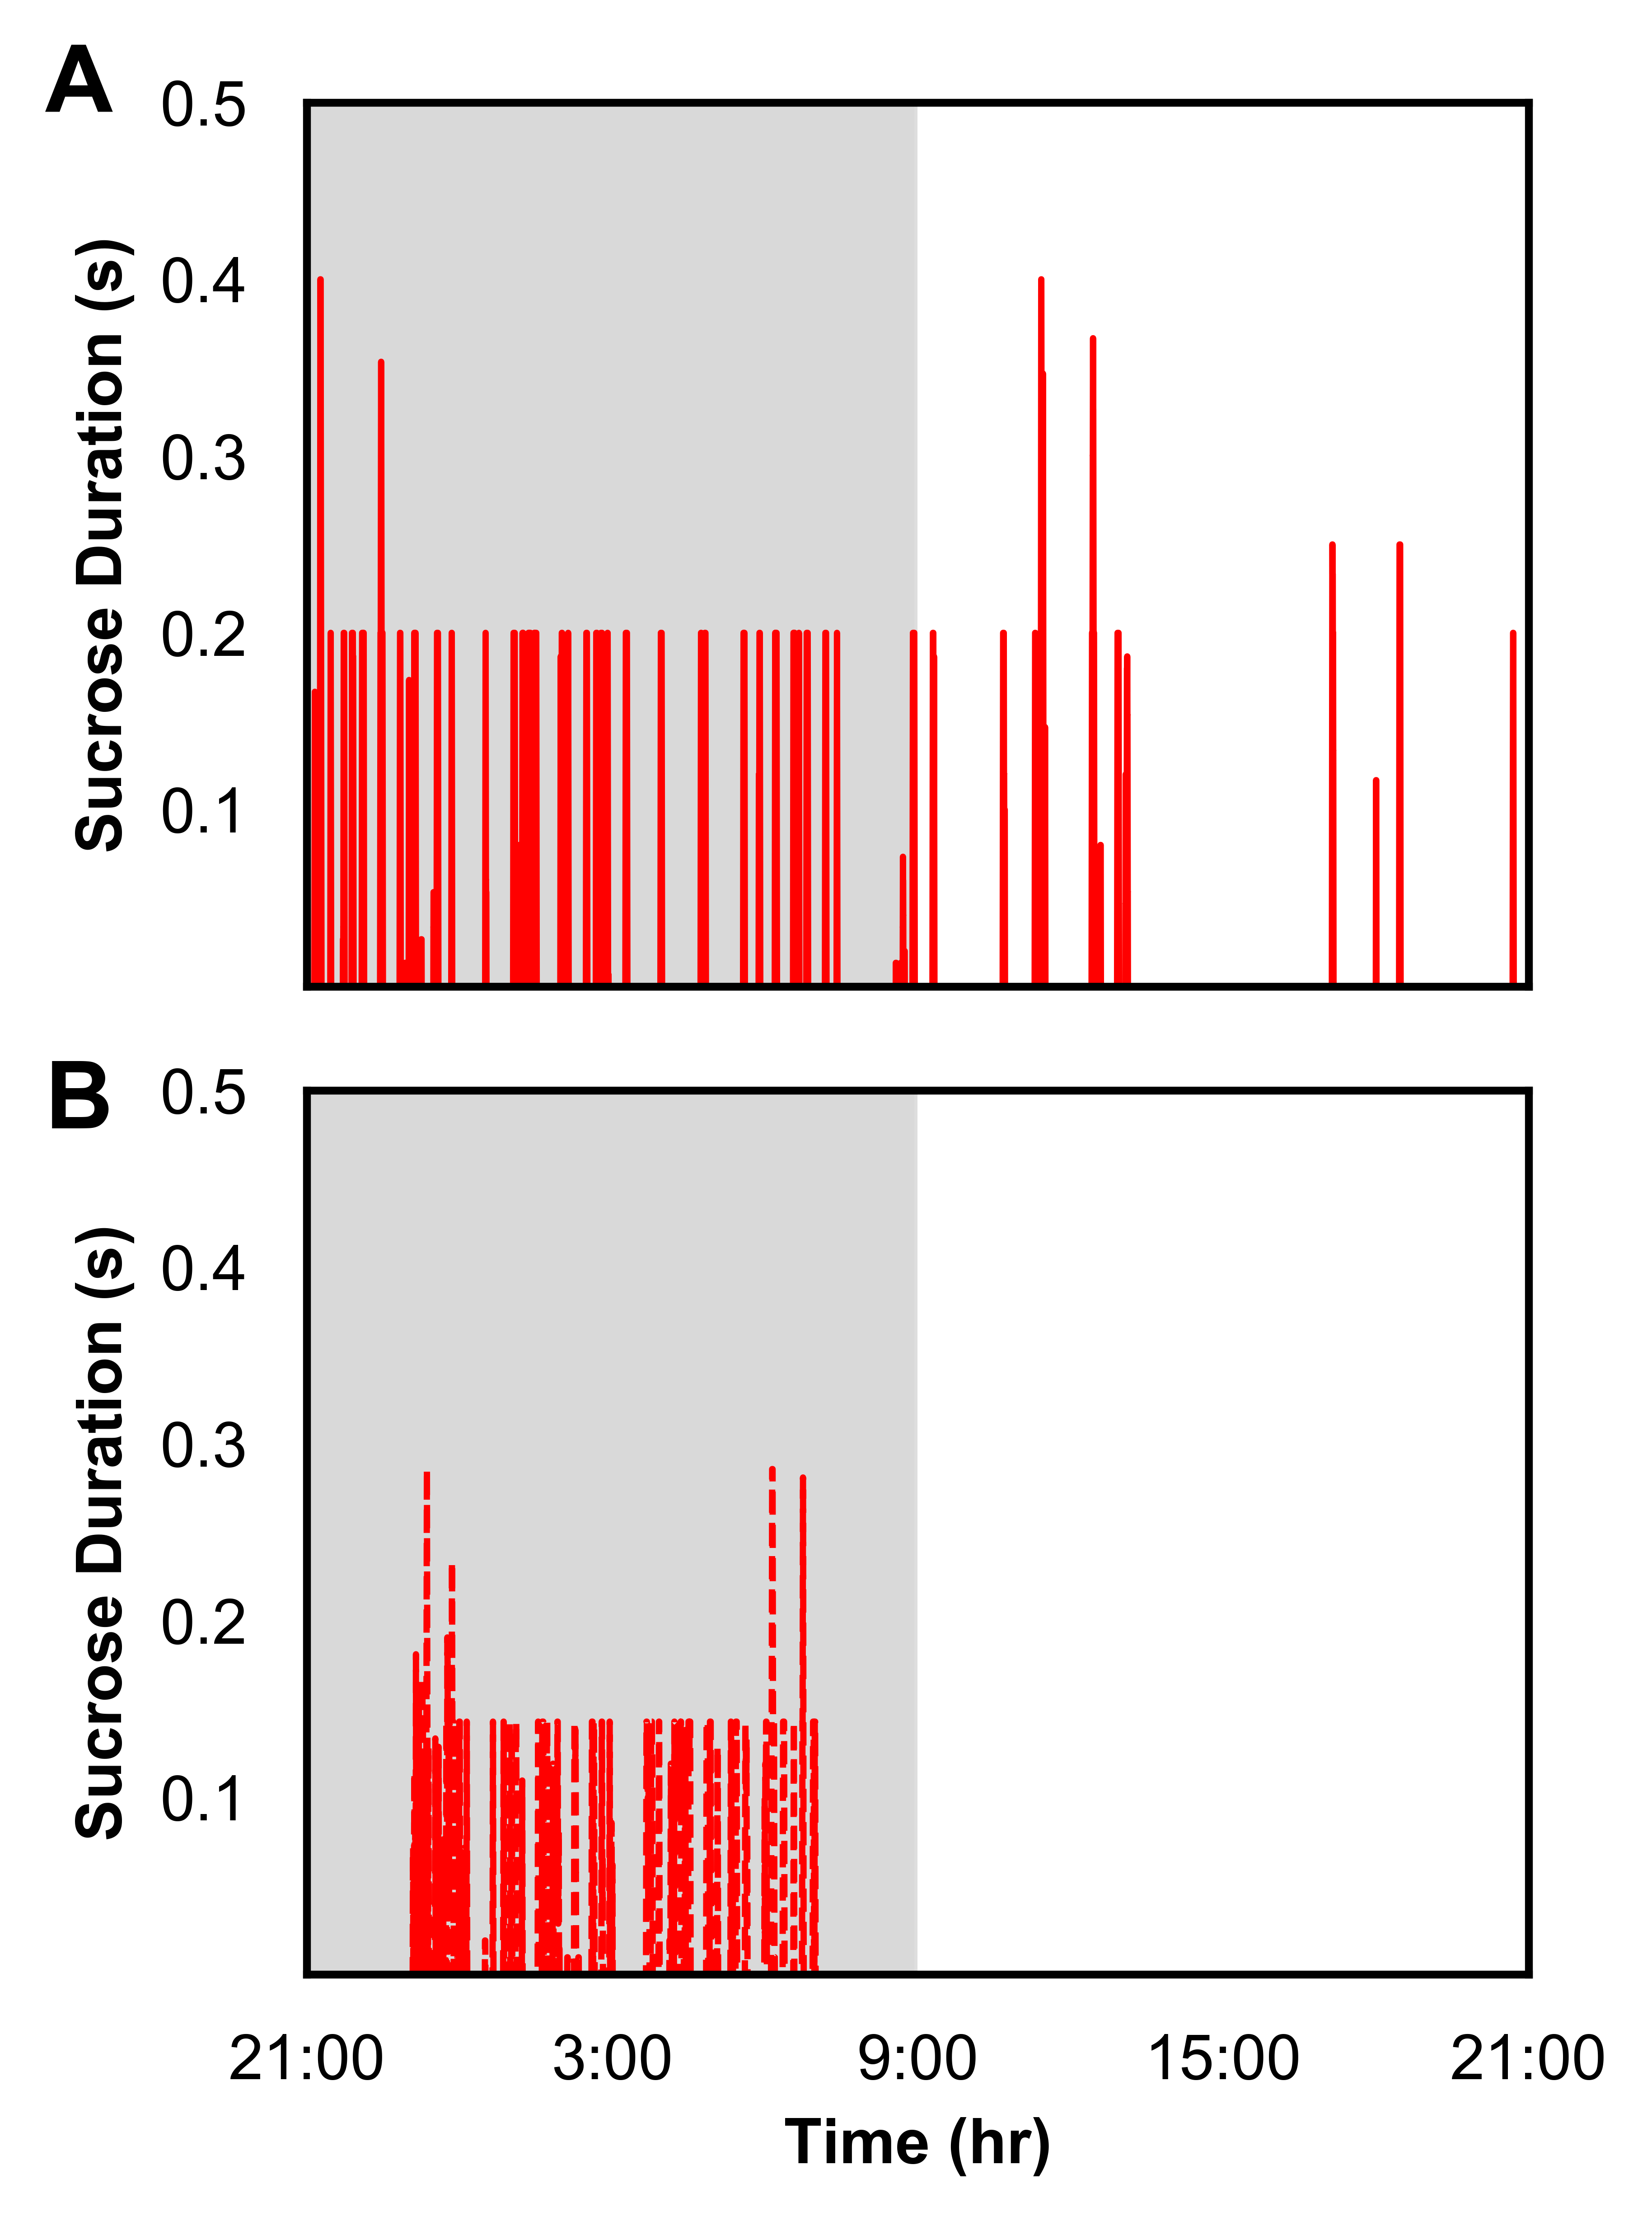

In [69]:
plt.figure(figsize = (3.75, 5))

plt.subplot(2, 1, 1)
time_plot_panel_v2(normalized_sucrose["HFHS Ad Lib"], "red", "-", 0.5, "Sucrose Duration (s)")
plt.xlabel('')
plt.xticks([])

# Remove leading 0
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.figtext(0.03, 0.95, "A", fontsize = 15, color = "black", fontweight = "bold")

plt.subplot(2, 1, 2)
time_plot_panel_v2(normalized_sucrose["HFHS Restricted"], "red", "--", 0.5, "Sucrose Duration (s)")

## Remove leading 0
plt.gca().yaxis.get_major_ticks()[0].label1.set_visible(False)
plt.figtext(0.03, 0.5, "B", fontsize = 15, color = "black", fontweight = "bold")

#plt.savefig("Integrated Sucrose Activity Panel v2.tif", dpi = 1000)
plt.show()

# Raster Plots
The following function will show the activities of **every** rat in each diet group

## Create a Panel for Feeding Activity

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


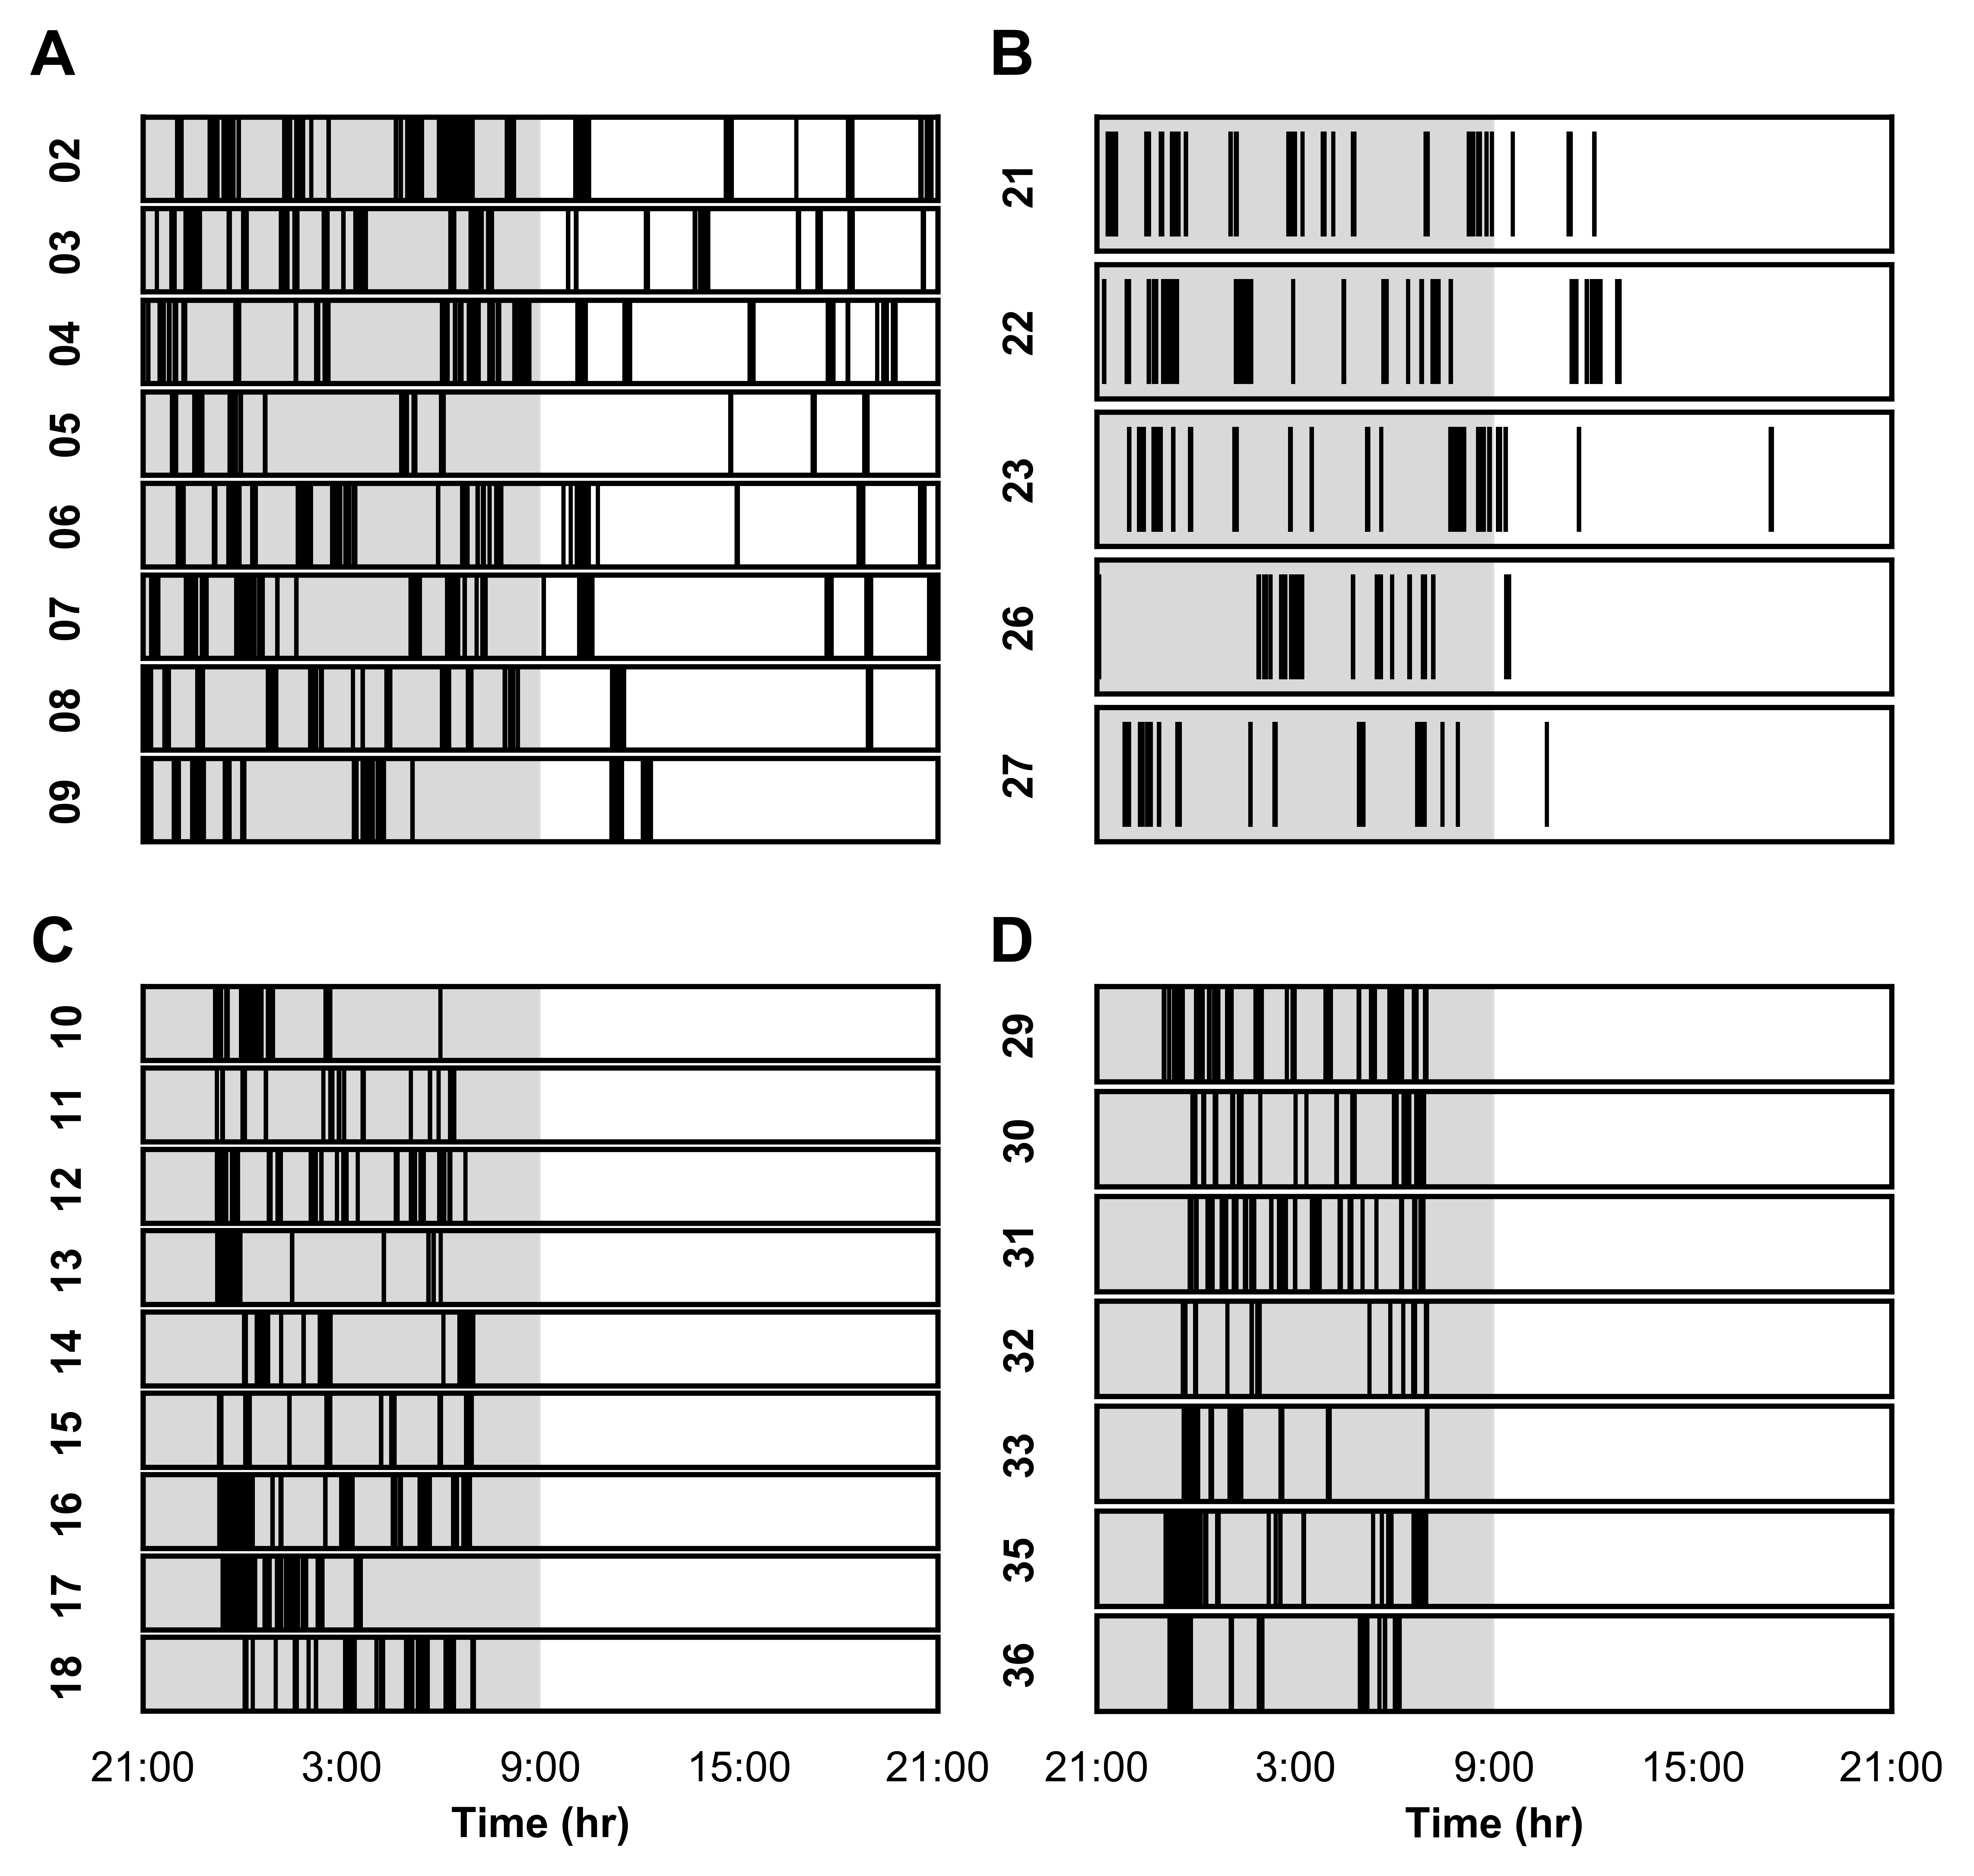

In [13]:
dietframes = [cont_adlib_feeding, hfhs_adlib_feeding, cont_restr_feeding, hfhs_restr_feeding]

#----------------------------------------------------------
# Method to create a panel for raster plots for Feeding Activity
#----------------------------------------------------------
fig = plt.figure(figsize = (7.48, 7))
outer = gridspec.GridSpec(2, 2, wspace=0.2, hspace=0.2)

for i, group in zip(range(4), dietframes):
    inner = gridspec.GridSpecFromSubplotSpec(len(group.columns), 1,
                    subplot_spec=outer[i], wspace=0.5, hspace=0.1)   
    
    for j, column in zip(range(len(group.columns)), group):
        ax = plt.Subplot(fig, inner[j])
        ax.plot(group[column], '|', markersize = 25, color = 'black')
        ax.set_ylim(0.8, 1.2)
        ax.set_yticklabels([])
        ax.set_ylabel(column.split("Rat")[1], fontsize=10, fontweight='bold', color = 'black')
        ax.set_xticklabels([])
        fig.add_subplot(ax)
        plt.xlim('1970-01-01 21:00:00.000', '1970-01-02 21:00:00.000')
        plt.axvspan('1970-01-01 21:00:00.000', '1970-01-02 9:00:00.000', facecolor='black', alpha=0.15)
    
    plt.xlabel('Time (hr)', fontname = 'Arial', fontsize=10, fontweight='bold', color = 'black')
    plt.xticks(['1970-01-01 21:00:00.000', '1970-01-02 03:00:00.000', '1970-01-02 9:00:00.000', '1970-01-02 15:00:00.000', '1970-01-02 21:00:00.000'],['21:00', '3:00', '9:00', '15:00', '21:00'], rotation=0, fontname = 'Arial', fontsize=10, color = 'black')
    
    if i < 2:
        plt.xlabel('')
        plt.xticks([])
    plt.tight_layout()

plt.figtext(0.075, 0.9, "A", fontsize = 15, color = "black", fontweight = "bold")

plt.figtext(0.5, 0.9, "B", fontsize = 15, color = "black", fontweight = "bold")

plt.figtext(0.075, 0.48, "C", fontsize = 15, color = "black", fontweight = "bold")

plt.figtext(0.5, 0.48, "D", fontsize = 15, color = "black", fontweight = "bold")

#fig.savefig("Raster Feeding Activity Panel.tif", dpi = 1000)
fig.show()

## Create Panel for Sucrose Activity

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


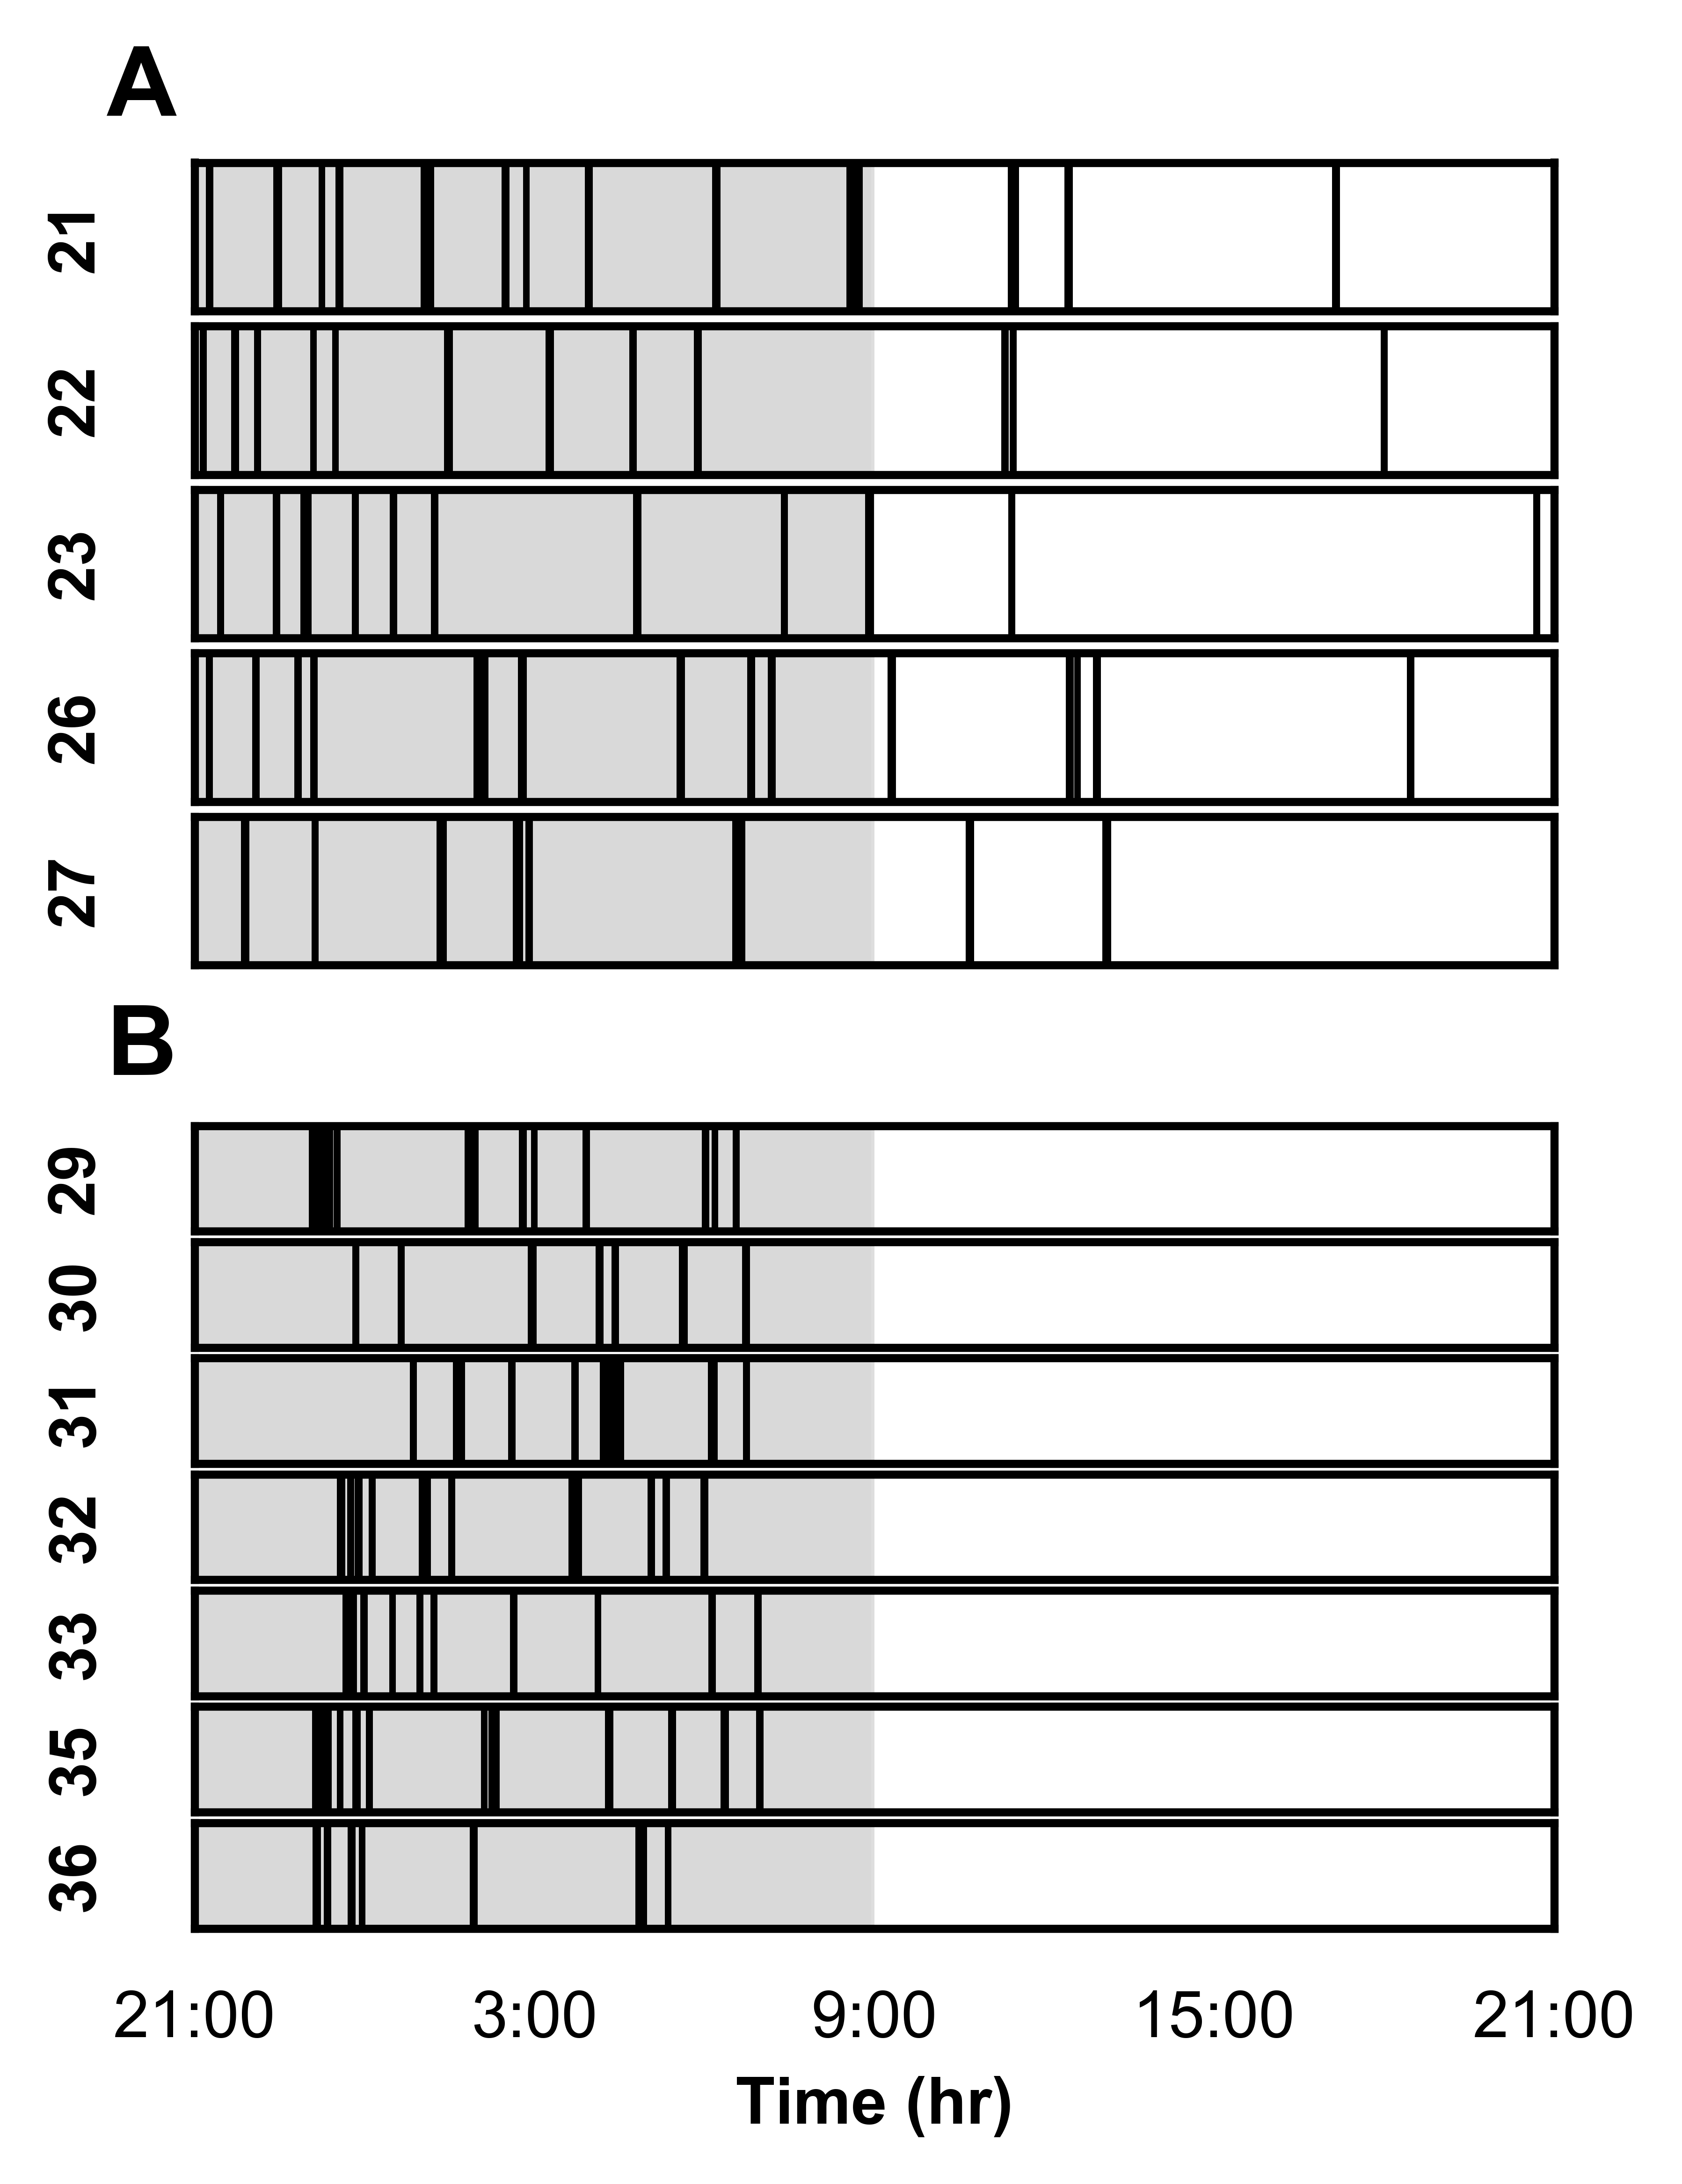

In [14]:
#----------------------------------------------------------
# Method to create a panel for raster plots for Sucrose Activity
#----------------------------------------------------------
fig = plt.figure(figsize = (3.75, 5))
outer = gridspec.GridSpec(2, 1, wspace=0.2, hspace=0.2)

drinkframes = [hfhs_adlib_sucrose, hfhs_restr_sucrose]

for i, group in zip(range(2), drinkframes):
    inner = gridspec.GridSpecFromSubplotSpec(len(group.columns), 1,
                    subplot_spec=outer[i], wspace=0.5, hspace=0.1)   
    
    for j, column in zip(range(len(group.columns)), group):
        ax = plt.Subplot(fig, inner[j])
        ax.plot(group[column], '|', markersize = 25, color = 'black')
        ax.set_ylim(0.8, 1.2)
        ax.set_yticklabels([])
        ax.set_ylabel(column.split("Rat")[1], fontsize=10, fontweight='bold', color = 'black')
        ax.set_xticklabels([])
        fig.add_subplot(ax)
        plt.xlim('1970-01-01 21:00:00.000', '1970-01-02 21:00:00.000')
        plt.axvspan('1970-01-01 21:00:00.000', '1970-01-02 9:00:00.000', facecolor='black', alpha=0.15)
    
    plt.xlabel('Time (hr)', fontname = 'Arial', fontsize=10, fontweight='bold', color = 'black')
    plt.xticks(['1970-01-01 21:00:00.000', '1970-01-02 03:00:00.000', '1970-01-02 9:00:00.000', '1970-01-02 15:00:00.000', '1970-01-02 21:00:00.000'],['21:00', '3:00', '9:00', '15:00', '21:00'], rotation=0, fontname = 'Arial', fontsize=10, color = 'black')
    if i < 1:
        plt.xlabel('')
        plt.xticks([])
    plt.tight_layout()

plt.figtext(0.075, 0.9, "A", fontsize = 15, color = "black", fontweight = "bold")

plt.figtext(0.075, 0.49, "B", fontsize = 15, color = "black", fontweight = "bold")

#fig.savefig("Raster Sucrose Activity Panel.tif", dpi = 1000)
fig.show()

# *Statistical Analysis*

## Creating CSV Files - No Need to Run These Cells if there is already a "food_total.csv" file

## Calculate total food consumption for each rat during light and dark phases

In [15]:
def light_summary(df, timeseries):
    # Time of light on, the data start at light on
    light_start = pd.to_datetime('1970-01-02 09:00:00')
    #Separate dataframes into light and dark times
    dark = timeseries[timeseries.index<light_start]
    light = timeseries[timeseries.index>light_start]
    # Calculate total food consumption per rat
    total_eating_light = light.sum(axis=0).astype(int)
    total_eating_dark  = dark.sum(axis=0).astype(int)
    # Record food comsumption into a new dataframe, using rat number as index
    for x in total_eating_light.index:
        ind = int(x[-2:])
        df.loc[ind]=[total_eating_light[x], total_eating_dark[x]]
    return (df)

Compile food consumption in each experimental group into single dataframe

In [16]:
column_names = ["light_food", "dark_food"]
df = pd.DataFrame(columns = column_names)

df = light_summary(df, cont_adlib_feeding)
df = light_summary(df, cont_restr_feeding)
df = light_summary(df, hfhs_adlib_feeding)
df = light_summary(df, hfhs_restr_feeding)

df

light_food dark_food
2        2119      4956
3        1068      2968
4        2600      3987
5         591      2145
6        1812      3949
7        2391      4661
8        1199      3383
9        1099      2568
10          0      1482
11          0       502
12          0      2075
13          0      1880
14          0      2550
15          0      1253
16          0      2156
17          0      5736
18          0      1093
21         72      2574
22        380      2776
23        401      2873
26         21       778
27         12      1357
29          0      2168
30          0      1418
31          0      1563
32          0       796
33          0       833
35          0      2432
36          0      1662

Download file with groups

In [17]:
groups_location = 'https://www.dropbox.com/s/37toe3vct1pipn5/groups.csv?dl=1'
groups_data = pd.read_csv(groups_location , index_col=0)
groups_data.head() 

diet feeding
Rat                 
1    control  ad lib
2    control  ad lib
3    control  ad lib
4    control  ad lib
5    control  ad lib

Add experimental group to total food consumption dataframe

In [18]:
df['group']=groups_data.loc[df.index].diet+' '+groups_data.loc[df.index].feeding
df.to_csv('food_total.csv')
df.head()

light_food dark_food           group
2       2119      4956  control ad lib
3       1068      2968  control ad lib
4       2600      3987  control ad lib
5        591      2145  control ad lib
6       1812      3949  control ad lib

## Import "food_total.csv" file 

In [19]:
food_total_location = "https://www.dropbox.com/s/d631mi6z7c9g9lt/food_total.csv?dl=1"
feeding_data = pd.read_csv(food_total_location , index_col=0)
feeding_data['total_food'] = feeding_data['light_food'] + feeding_data['dark_food']
feeding_data

light_food  dark_food                group  total_food
2         2119       4956       control ad lib        7075
3         1068       2968       control ad lib        4036
4         2600       3987       control ad lib        6587
5          591       2145       control ad lib        2736
6         1812       3949       control ad lib        5761
7         2391       4661       control ad lib        7052
8         1199       3383       control ad lib        4582
9         1099       2568       control ad lib        3667
10           0       1482  control restriction        1482
11           0        502  control restriction         502
12           0       2075  control restriction        2075
13           0       1880  control restriction        1880
14           0       2550  control restriction        2550
15           0       1253  control restriction        1253
16           0       2156  control restriction        2156
17           0       5736  control restriction        5736
18           0       1093  control restriction        1093
21          72       2574          HFHS ad lib        2646
22         380       2776          HFHS ad lib        3156
23         401       2873          HFHS ad lib        3274
26          21        778          HFHS ad lib         799
27          12       1357          HFHS ad lib        1369
29           0       2168     HFHS restriction        2168
30           0       1418     HFHS restriction        1418
31           0       1563     HFHS restriction        1563
32           0        796     HFHS restriction         796
33           0        833     HFHS restriction         833
35           0       2432     HFHS restriction        2432
36           0       1662     HFHS restriction        1662

### Download plot parameters

In [20]:
plot_data_location = "https://www.dropbox.com/s/djpbvky0mwxpups/plotting_by_group.csv?dl=1"
plot_parameters = pd.read_csv(plot_data_location, index_col=0)
plot_parameters

color marker line_type hatches hatch_colors fill_color  \
group                                                                        
control ad lib       grey      o         -                 grey       grey   
control restriction  grey      v        --       /         grey      white   
HFHS ad lib           red      o         -                  red        red   
HFHS restriction      red      v        --       /          red      white   

                    label  
group                      
control ad lib         CA  
control restriction    CR  
HFHS ad lib            HA  
HFHS restriction       HR

### Function which plots given variable of the dataframe 

In [21]:
def eating_graph(df, variable, title):
    ax1 = sns.swarmplot(x=df.group, y=df[variable], color='black', size=3)
    ax = sns.boxplot    (x=df.group, y=df[variable], color='white', linewidth=1, palette=plot_parameters.fill_color, showfliers = False)
    # Make hatched pattern to distinguish between Ad lib and restriction
    for i, hatch, patch in zip(plot_parameters.hatch_colors, plot_parameters.hatches, ax.artists):
        patch.set_hatch(hatch)
        patch.set_edgecolor(i)
    # Add x- and y-labels, ticks, and units
    plt.ylabel(title, fontsize=10, fontweight = "bold", color = "black")
    plt.ylim(0,8000)
    plt.xlabel('')
    plt.xticks(range(len(plot_parameters.index)), ('Cont\nAL', 'Cont\nRes', 'HFHS\nAL', 'HFHS\nRes'), fontweight = 'bold', fontsize=10, color = "black")
    plt.yticks(fontweight = 'bold', fontsize=10, color = "black")
    plt.setp(ax.lines, color="black")
    return()


### Compare Light vs Day Feeding Activity in Rats

In [22]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
eating_graph(feeding_data, 'total_food', "Total Eating (sec)")
plt.subplot(1,3,3)
eating_graph(feeding_data, 'light_food', "Light Eating (sec)")
plt.subplot(1,3,2)
eating_graph(feeding_data, 'dark_food', "Dark Eating (sec)")
#plt.savefig('total_eating_time.png')
plt.show()

### Analyze Hourly Feeding Activity in Rats

In [54]:
cont_adlib_feeding_hourly = cont_adlib_feeding.resample("1H").sum().T
hfhs_adlib_feeding_hourly = hfhs_adlib_feeding.resample("1H").sum().T
cont_restr_feeding_hourly = cont_restr_feeding.resample("1H").sum().T
hfhs_restr_feeding_hourly = hfhs_restr_feeding.resample("1H").sum().T

hourly_feeding_frames = [cont_adlib_feeding_hourly, cont_restr_feeding_hourly, hfhs_adlib_feeding_hourly, hfhs_restr_feeding_hourly]
feeding_hourly_frame = pd.concat(hourly_feeding_frames).astype(int)
feeding_hourly_frame.index = feeding_hourly_frame.index.map(lambda x: int(str(x)[3:]))
feeding_hourly_frame['group']=groups_data.loc[feeding_hourly_frame.index].diet+' '+groups_data.loc[feeding_hourly_frame.index].feeding


feeding_hourly_frame.columns = ["Hour21", "Hour22", "Hour23", "Hour0", 
                                "Hour1", "Hour2", "Hour3", "Hour4",
                                "Hour5", "Hour6", "Hour7", "Hour8",
                                "Hour9", "Hour10", "Hour11", "Hour12",
                                "Hour13", "Hour14", "Hour15", "Hour16",
                                "Hour17", "Hour18", "Hour19", "Hour20",
                                "group"]
feeding_hourly_frame["First 2-Hour Feeding Rate Per Hour"] = feeding_hourly_frame[["Hour23", "Hour0"]].mean(axis=1)
feeding_hourly_frame["Mid 4-Hour Feeding Rate Per Hour"] = feeding_hourly_frame[["Hour1", "Hour2", "Hour3", "Hour4"]].mean(axis=1)
feeding_hourly_frame["Last 2-Hour Feeding Rate Per Hour"] = feeding_hourly_frame[["Hour5", "Hour6"]].mean(axis=1)

feeding_hourly_frame

Hour21  Hour22  Hour23  Hour0  Hour1  Hour2  Hour3  Hour4  Hour5  Hour6  \
2        0     501    1090      0   1169     25      0     82    371   1590   
3      385     575      91    265    419    387    322      0      0    431   
4      701      70     212      0     79    648      0      0      0   1066   
5      461     381     600     53      0      0      0    300     76    274   
6        0     650    1062    398    394    314    562      0     38    127   
7      435    1114     495   1065     76      0      0      0    634    825   
8      717     593       0    404     56    757     41    124      0    587   
9      272     813     532    202      0      0    464    276      9      0   
10       0       0     345   1075      0     40      0      0     22      0   
11       0       0      72    101      0    163     78      0     23     65   
12       0       0     895    179     71    576     82     51    117    104   
13       0       0    1808      0     10      0      0     26     36      0   
14       0       0       0   1021     59    885      0      0      0    585   
15       0       0     135    238     14    435      0    162     72    197   
16       0       0     633    445     79     50    302    304    184    159   
17       0       0    1547   1664   1489    505    531      0      0      0   
18       0       0       0     25     43     20     93     94    503    315   
21     108     190     709      0    137    470    205    191      0    240   
22     280     306     686      0    580      5      0     42    370     52   
23      46    1318      62      0     98     59     15      0    165      0   
26      27       0       0      0     75    388    111     18     67     87   
27     130     641      60      0     31    105      0     56      2    308   
29       0       0     407    427    144    110     98    170    192    620   
30       0       0      32    242    406      0     12    312     10    404   
31       0       0     109    235    401    191    302     85     11    229   
32       0       0     169      3    280      0      0      0      7    337   
33       0       0     198    145    195    200     19      6      0     70   
35       0       0    1092    247      0     31     82      0     29    951   
36       0       0    1153      0     45      0      0    168     67    229   

    ...  Hour15  Hour16  Hour17  Hour18  Hour19  Hour20                group  \
2   ...       0       2       0     378       0     648       control ad lib   
3   ...       0     107     330     170       0      33       control ad lib   
4   ...     335       0     587      59     596       0       control ad lib   
5   ...       0       0     209     322       0       0       control ad lib   
6   ...       0       0       0     484       0     401       control ad lib   
7   ...       0       0     384     525       0     526       control ad lib   
8   ...       0       0       0     352       0       0       control ad lib   
9   ...       0       0       0       0       0       0       control ad lib   
10  ...       0       0       0       0       0       0  control restriction   
11  ...       0       0       0       0       0       0  control restriction   
12  ...       0       0       0       0       0       0  control restriction   
13  ...       0       0       0       0       0       0  control restriction   
14  ...       0       0       0       0       0       0  control restriction   
15  ...       0       0       0       0       0       0  control restriction   
16  ...       0       0       0       0       0       0  control restriction   
17  ...       0       0       0       0       0       0  control restriction   
18  ...       0       0       0       0       0       0  control restriction   
21  ...       0       0       0       0       0       0          HFHS ad lib   
22  ...       0       0       0       0       0       0          HFHS ad lib   
23  ...       0       0     137  

#### Function which plots given hour(s) of hourly dataframe

In [32]:
def hourly_graph(df, time, title, ymax = 2000):
    ax1 = sns.swarmplot(x=df.group, y=df[time], color='black', size=3)
    ax = sns.boxplot    (x=df.group, y=df[time], color='white', linewidth=1, palette=plot_parameters.fill_color, showfliers = False)
    # Make hatched pattern to distinguish between Ad lib and restriction
    for i, hatch, patch in zip(plot_parameters.hatch_colors, plot_parameters.hatches, ax.artists):
        patch.set_hatch(hatch)
        patch.set_edgecolor(i)
    # Add x- and y-labels, ticks, and units
    plt.ylabel(title, fontsize=10, fontweight = "bold", color = "black")
    plt.ylim(0,ymax)
    plt.xlabel('')
    plt.xticks(range(len(plot_parameters.index)), ('Cont\nAL', 'Cont\nRes', 'HFHS\nAL', 'HFHS\nRes'), fontweight = 'bold', fontsize=10, color = "black")
    plt.yticks(fontweight = 'bold', fontsize=10, color = "black")
    plt.setp(ax.lines, color="black")
    return()

### Compare 3-Phase Feeding Activity in Rats Using Random Hours

In [33]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
hourly_graph(feeding_hourly_frame, 'Hour23', "First Hour Eating (sec)")
plt.subplot(1,3,2)
hourly_graph(feeding_hourly_frame, 'Hour0', "2nd Hour Eating (sec)")
plt.subplot(1,3,3)
hourly_graph(feeding_hourly_frame, 'Hour6', "Last Hour Eating (sec)")
#plt.savefig('total_eating_time.png')
plt.show()

## Compare Hourly Rates at the 3 Phases of Night

In [55]:
plt.figure(figsize=(18, 5))
plt.subplot(1,3,1)
hourly_graph(feeding_hourly_frame, "First 2-Hour Feeding Rate Per Hour", "First Phase Consumption Rate (sec/hour)")
plt.subplot(1,3,2)
hourly_graph(feeding_hourly_frame, "Mid 4-Hour Feeding Rate Per Hour", "Second Phase Consumption Rate (sec/hour)")
plt.subplot(1,3,3)
hourly_graph(feeding_hourly_frame, "Last 2-Hour Feeding Rate Per Hour", "Third Phase Consumption Rate (sec/hour)")
#plt.savefig('total_eating_time.png')
plt.show()

## ANOVA Analysis Comparing the Three Rates